In [2]:
import numpy as np 
import pandas as pd 
import warnings
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
warnings.filterwarnings('ignore')

## Data Preprocessing  

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail(6)

,age,sex,bmi,children,smoker,region,charges
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.shape

(1338, 7)

In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Label Encoding

# Sex 
lencode = LabelEncoder()
lencode.fit(data.sex.drop_duplicates()) 
data.sex = lencode.transform(data.sex)

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [11]:
# Smoker Or Non smoker 
lencode.fit(data.smoker.drop_duplicates()) 
data.smoker = lencode.transform(data.smoker)

In [12]:
#region
lencode.fit(data.region.drop_duplicates()) 
data.region = lencode.transform(data.region)

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Data Corelation 

In [14]:
data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

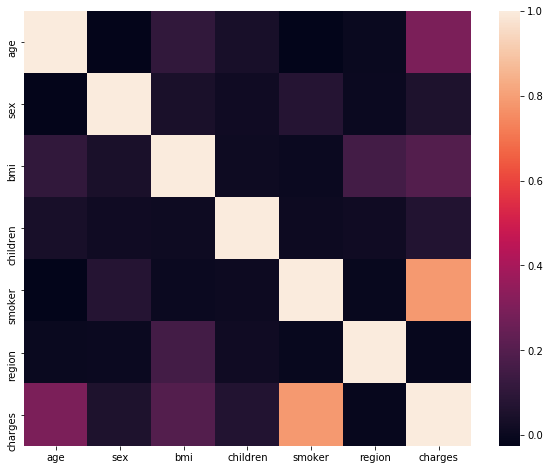

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool))

## Distribution of charges for non-smokers

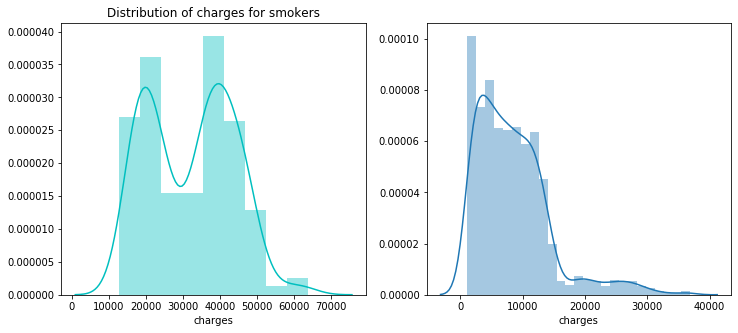

In [16]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['charges'],ax=ax)


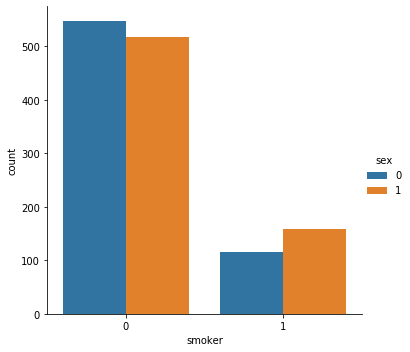

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=data)

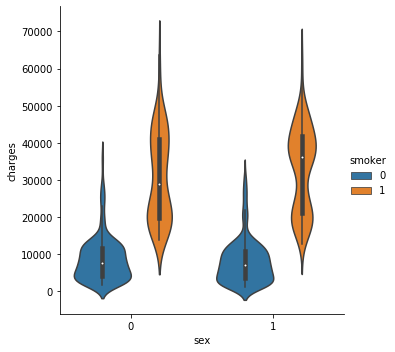

In [18]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=data)

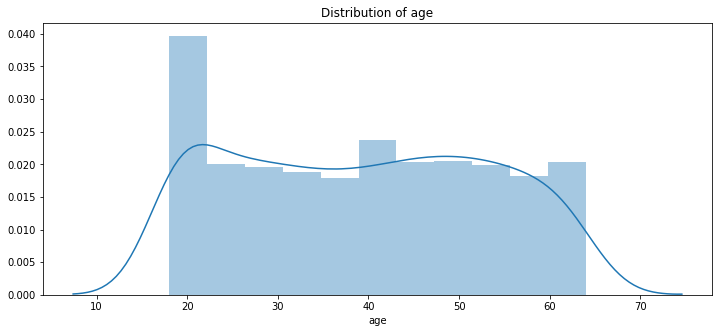

In [19]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"])

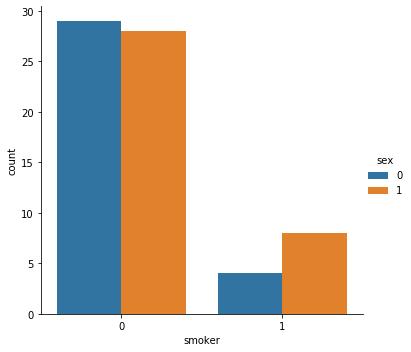

In [20]:
# The number of smokers and non-smokers (18 years old)
sns.catplot(x="smoker", kind="count",hue = 'sex',  data=data[(data.age == 18)])


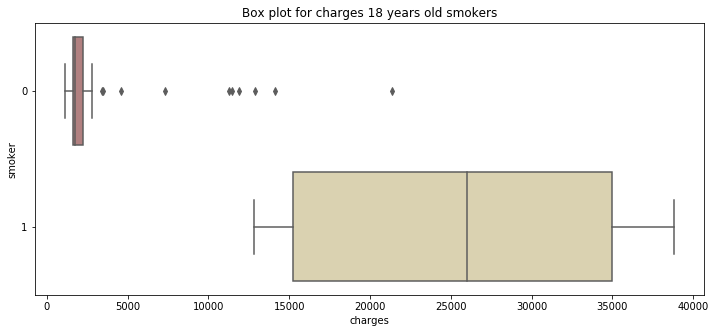

In [21]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

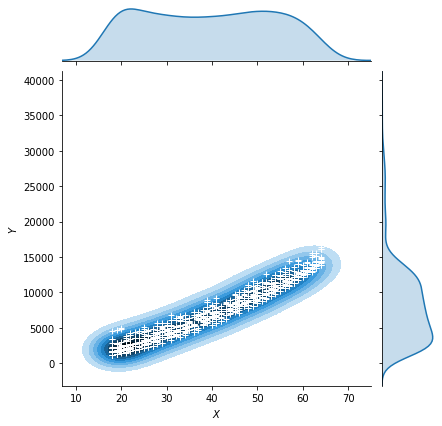

In [22]:
# Distribution of charges and age for non-smokers

g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 0)],kind="kde")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")


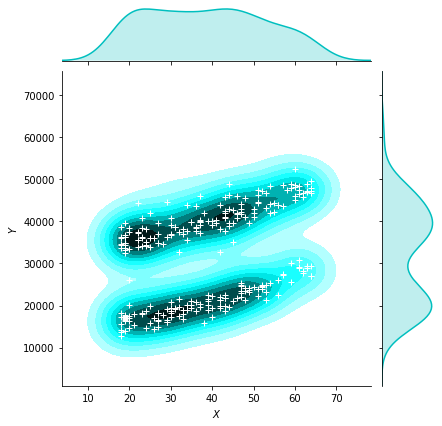

In [23]:
# Distribution of charges and age for smokers

g = sns.jointplot(x="age", y="charges", data = data[(data.smoker == 1)],kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")


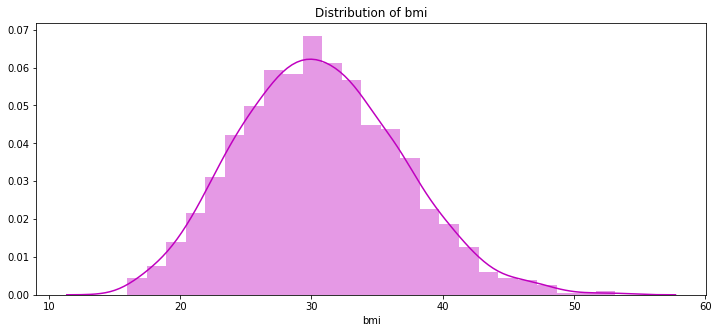

In [24]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

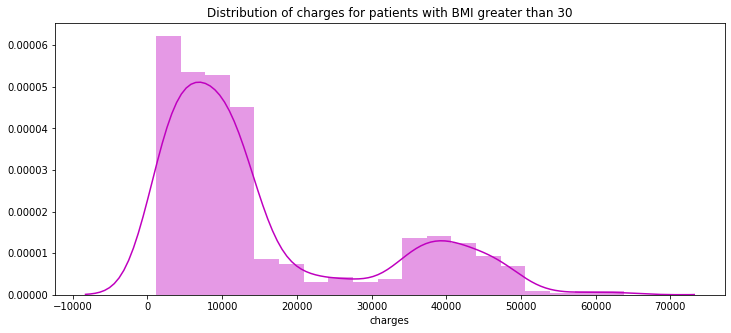

In [25]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['charges'], color = 'm')

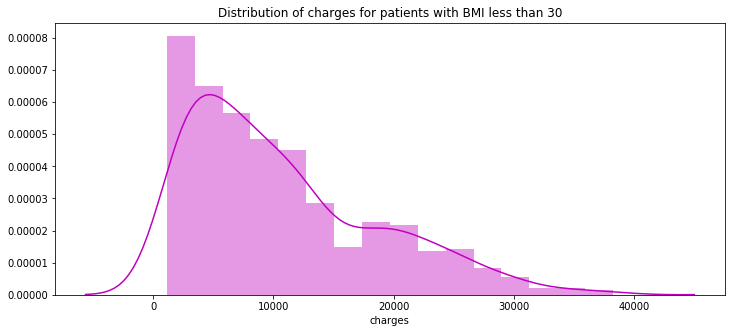

In [26]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['charges'], color = 'm')

Text(0.5, 1, 'Distribution of bmi and charges')

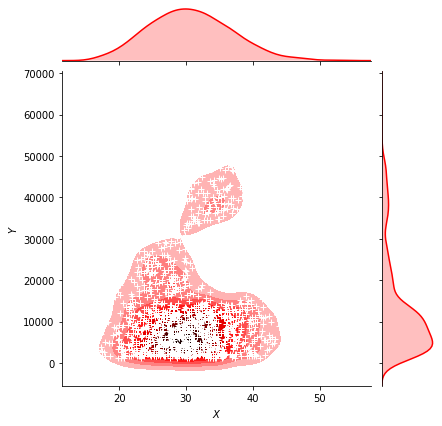

In [27]:
g = sns.jointplot(x="bmi", y="charges", data = data,kind="kde", color="r")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

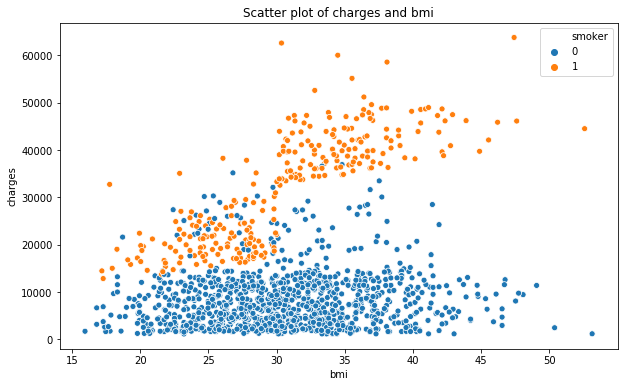

In [28]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,hue='smoker')
ax.set_title('Scatter plot of charges and bmi')


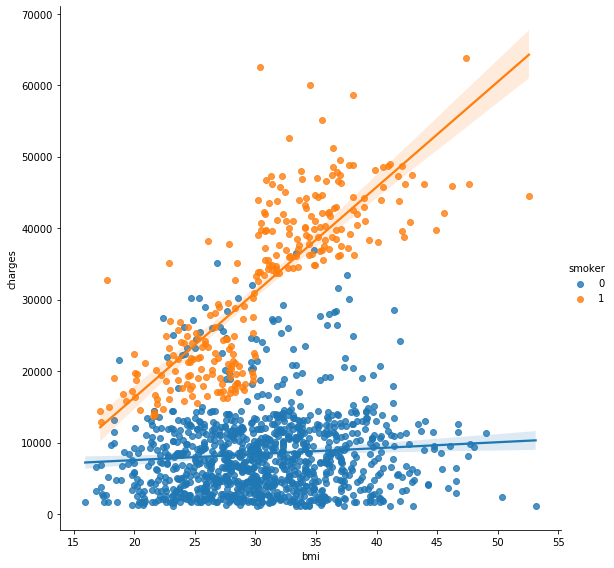

In [29]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, size = 8)

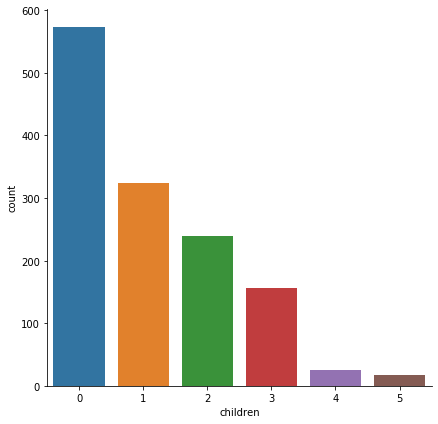

In [30]:
sns.catplot(x="children", kind="count", data=data, size = 6)


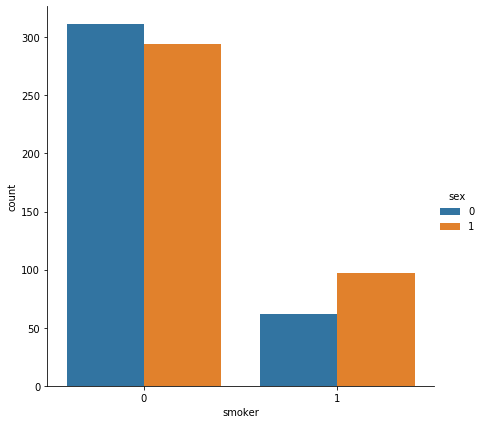

In [31]:
sns.catplot(x="smoker", kind="count",hue = "sex",
            data=data[(data.children > 0)], size = 6)


In [32]:
X = data.drop(['charges'], axis = 1)
y = data.charges

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [44]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3729086.094, MSE test data: 19933823.142
R2 train data: 0.974, R2 test data: 0.873
